In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [9]:
df = pd.read_csv("C:/Users/admin/Intern/Linear Rigression/winequality-red.csv", sep=';')

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df['quality'].value_counts().sort_index()


quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [ ]:
# Convert quality to binary classification 
df['quality_label'] = (df['quality'] >= 6.5).astype(int) # 6.5 and above is good quality and below 6.5 is not
df.drop('quality', axis=1, inplace=True)

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [15]:
X = df.drop('quality_label', axis=1)
y = df['quality_label']

<Axes: xlabel='quality_label', ylabel='count'>

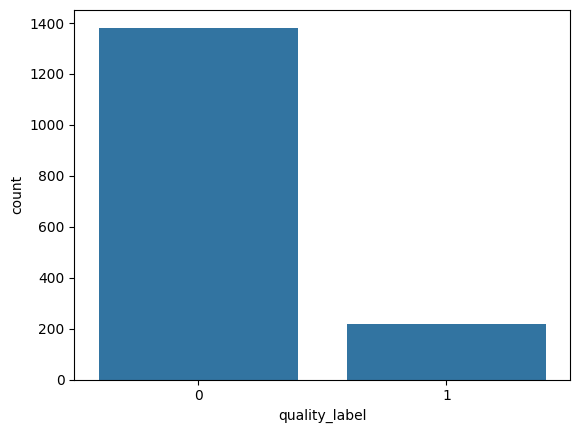

In [16]:
sns.countplot(x='quality_label', data=df)

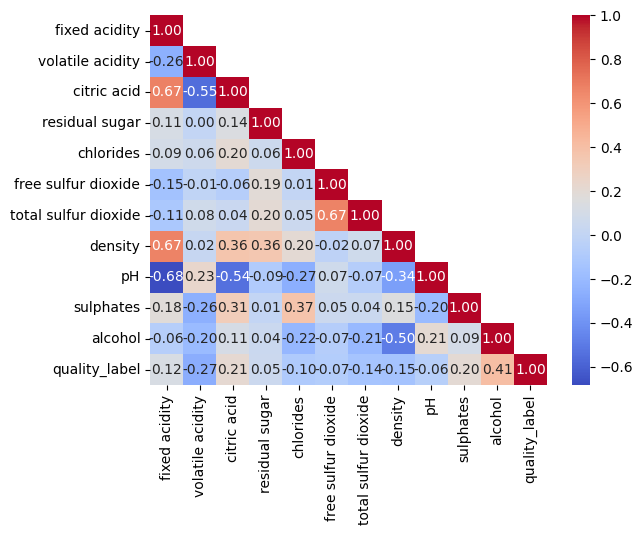

In [21]:
mask = np.triu(np.ones_like(df.corr()), k=1)
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
y_pred = knn.predict(X_test_scaled)

In [28]:
print("Accuracy score : ", accuracy_score(y_test, y_pred))

Accuracy score :  0.89375


In [ ]:
parameters = {
	'n_neighbors': np.arange(1, 21),
	'weights': ['uniform', 'distance'], # equal or weighted neighbors
	'metric': ['euclidean', 'manhattan', 'minkowski'], 
 	'p': [1, 2, 3], # p=1 manhattan, p=2 euclidean++
	'leaf_size': [10, 20, 30, 40, 50], # size of leaf (affects on speed)
}

In [30]:
grid = GridSearchCV(knn, parameters, cv=5)
grid.fit(X_train_scaled, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'leaf_size': [10, 20, ...], 'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': array([ 1, 2... 18, 19, 20]), 'p': [1, 2, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,np.int64(19)


In [31]:
print("Best parameters : ", grid.best_params_)

Best parameters :  {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': np.int64(19), 'p': 3, 'weights': 'distance'}


In [32]:
y_pred = grid.predict(X_test_scaled)

In [33]:
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred))
print("Classification report : \n", classification_report(y_test, y_pred))

Accuracy score :  0.9375
Confusion matrix : 
 [[273   4]
 [ 16  27]]
Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       277
           1       0.87      0.63      0.73        43

    accuracy                           0.94       320
   macro avg       0.91      0.81      0.85       320
weighted avg       0.93      0.94      0.93       320



In [37]:
k_range = list(range(1, 31))
accuracy_hist = []

for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train_scaled, y_train)
	y_pred = knn.predict(X_test_scaled)
	acc = accuracy_score(y_test, y_pred)
	accuracy_hist.append(acc)

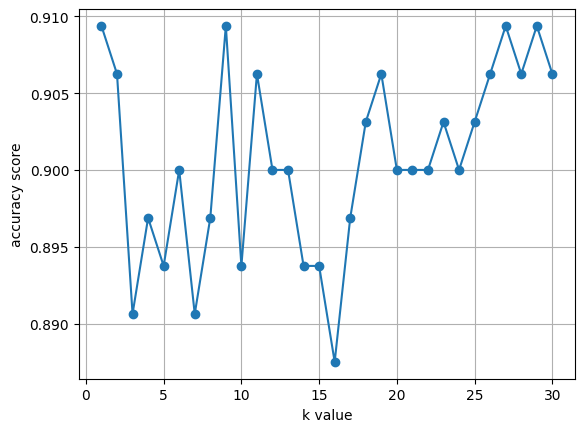

In [39]:
plt.plot(k_range, accuracy_hist, marker='o')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid(True)
plt.show()